# Shazam - Aufgabenblatt 3: Modell zur Erkennung eines Musikstückes
## Einleitung
Shazam ist eine App, die Musikstücke in Sekundenbruchteilen erkennt und dem Benutzer mitteilt. Ein Klick auf die Smartphone-App und der Nutzer weiß alles über den bis dato noch unbekannten Song. Aber wie funktioniert Shazam? Genau das sollt ihr mit Aufgabenblatt 3 lernen.

### Die Idee hinter Shazam
Die Grundidee hinter Shazam besteht darin, Frequenzen der dominierenden Teiltöne eines (kleinen) Songausschnitts mit den gespeicherten dominierenden Frequenzen von Songs in einer Datenbank zu vergleichen. Bei diesem Vergleich ist insbesondere die zeitliche Abfolge der dominierenden Frequenzen entscheidend. Um die dominierenden Frequenzen zu bestimmen, unterteilt Shazam die Musikstücke in der Datenbank und den aufgenommenen Songausschnitt in kleine Zeitintervalle und führt in jedem dieser Intervall eine Fourieranalyse durch. Die Funktionsweise der Fourieranalyse kennt ihr bereits aus Blatt 2. Mithilfe der Fourieranalyse wird für jedes Zeitintervall ein Frequenzspektrum erstellt. In diesen Frequenzspektren sucht Shazam jeweils nach der Frequenz mit der maximalen Amplitude, also der Frequenz des lautesten Teiltons, und speichert diese Frequenz mit dem dazugehörigen Zeitpunkt ab. Es entsteht ein sogenanntes **Spektrogramm**. Dieses Spektrogramm stellt die dominierenden Frequenzen in einem Song oder Songausschnitt im zeitlichen Verlauf dar. Es ist für jedes Musikstück einzigartig, genau wie der Fingerabdruck eines Menschen. Bildlich gesprochen vergleicht Shazam nun das kleine Spektogramm der Aufnahme mit allen Spektogrammen in der Datenbank.
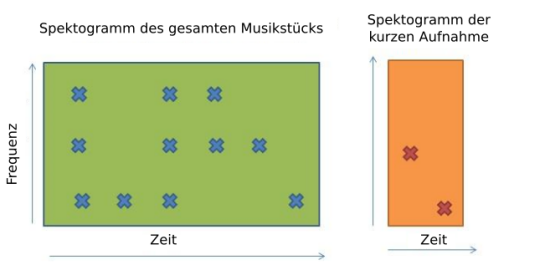
Bei diesem Vergleich muss berücksichtigt werden, dass der Songausschnitt in der Regel kürzer ist als die vollständigen Lieder in der Datenbank. Daher vergleicht Shazam das Spektrogramm der Aufnahme nicht mit den kompletten Spektrogrammen der Lieder in der Datenbank, sondern nur mit Ausschnitten dieser Spektrogramme. Diese Ausschnitte haben jeweils die gleiche Länge wie die Aufnahme selber. Man kann sich den Prozess wie folgt vorstellen: Ein Fenster der Länge des Spektrogramms der Aufnahme gleitet über die Spektrogramme der verschiedenen Songs in der Datenbank, bis das im Fenster befindliche Teilspektrogramm eines Songs mit dem Spektrogramm der Aufnahme übereinstimmt.
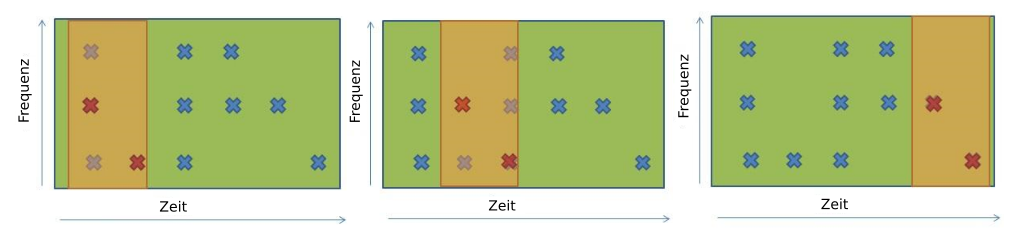
Im oben dargestellten Beispiel wurde eine perfekte Übereinstimmung zwischen der kurzen Aufnahme und dem Ende eines Musikstücks gefunden. Bei diesem Musikstück handelt es sich also um den gesuchten Song, der dem Nutzer nun mitgeteilt werden kann. Dieser Vergleich muss mit jedem gespeicherten Song in der Datenbank von Shazam geschehen, bis man eine Übereinstimmung wie im obigen Beispiel erzielt. 

*Damit dieses Arbeitsblatt funktioniert, musst du als erstes den folgenden Code ausführen. Klicke dazu auf das Code Feld und drücke auf "Run" (oder drücke Shift + Enter).*

In [1]:
# Hier nichts ändern
include("./code/ShazamTests.jl")

Main.Shazam

## Aufgabe 1)
### Problembeschreibung: Eine Aufnahme in der Datenbank finden
Eine effektive Implementation des oben beschriebenen Verfahrens, ist für das reibungslose Funktionieren der App notwendig. Da der von Shazam benutzte Algorithmus sehr kompliziert ist, werden wir hier einen vereinfachten Algorithmus betrachten, der dennoch einen guten Einblick in das grundlegende Konzept ermöglicht. Dazu erhaltet ihr das beiliegende Spektogramm einer kurzen Audioaufnahme.
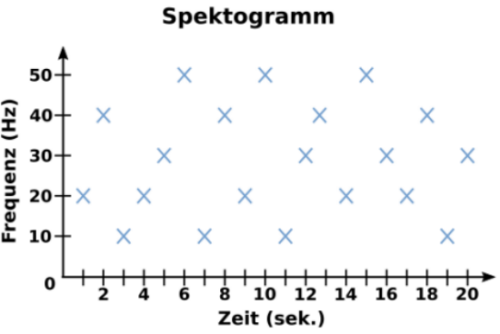
                                                                                                                     Ziel ist es, den zum Spektrogramm gehörenden Song in einer bereits programmierten Datenbank zu finden. Führt dazu die folgenden Schritte durch.

### Schritt 1: Target Zones bilden

Um den Fingerabdruck der Aufnahme zu erstellen, teilt Shazam die Datenpunkte im Spektogramm in Gruppen ein - die sogenannten **Target Zones**. Eine Target Zone besteht dabei aus jeweils fünf zeitlich aufeinander folgenden Datenpunkten, wobei sich zwei benachbarte Target Zones immer genau zwei Datenpunkte teilen.

- **a)** Nummeriert die Datenpunkte im Spektogramm auf dem beiliegendem Blatt nach der Zeit durch.
- **b)** Zeichnet die Target Zones wie oben beschrieben in euer Spektogramm ein. (Wenn ihr alles richtig macht, sollten sich sechs Target Zones ergeben.)
- **c)** Jede Target Zone braucht einen Referenzpunkt, den sogenannten **Anchor Point**. Der Anchor Point ist der erste Punkt in einer Target Zone. Umkreist die Anchor Points in eurem Frequenzspektrum.

### Schritt 2: Den Fingerabdruck speichern

Um den Fingerabdruck zu erzeugen, ordnet Shazam jedem Datenpunkt im Spektrogramm eine sogenannte Adresse zu und speichert diese ab. Die Liste der einzelnen Adressen bildet dann den Fingerabdruck. Die Adresse eines Datenpunktes besteht dabei aus folgenden drei Daten:

- **1.** Die Frequenz des Anchor Points, in dessen Target Zone sich der Datenpunkt befindet.
- **2.** Die Frequenz des Datenpunkts selbst. 
- **3.** Die Zeitdifferenz zwischen Anchor Point und Datenpunkt

**=>** Adresse: (Frequenz Anchor Point, Frequenz Datenpunkt, $\Delta$t)

Dabei ist zu beachten, dass es Punkte gibt, die mehr als eine Adresse haben! Die Anzahl der Adressen eines Punktes stimmt mit der Anzahl der Target Zones überein, die diesen Punkt enthalten. Denn jede Target Zone liefert einen anderen Anchor Point als Referenzpunkt, der die Adresse beeinflusst. Also ist jede Adresse immer bezüglich einer bestimmten Target Zone.


Wir wollen im Folgenden den Fingerabdruck unseres Spektrogramms erstellen bzw. vervollständigen.  

*Der folgende Code erzeugt den Fingerabdruck des obigen Spektrogramms. Er enthält die Adressen (Frequenz Anchor Point, Frequenz Datenpunkt, Zeitdifferenz Anchor Point zu Datenpunkt) aller Datenpunkte. Einige dieser Adressen sind jedoch noch unvollständig. Ersetzt in den unvollständigen Adressen `NaN` durch die korrekten Daten. Klickt anschließend auf den "Run" Button, um den vervollständigten Fingerabdruck zu speichern.* 

In [2]:
# Hier benötigen wir den Server
# --- Erste Targetzone --- #

# Zeitpunkt Anchor Point 1:
timeAnchor_1 = 1;

# Datenpunkte 1:
anchorFreq_1 = 20;
pointFreq_1 = 20;
T_delta_1 = 0;

# Datenpunkte 2:
anchorFreq_1 = 20;
pointFreq_2 = 40;
T_delta_2 = 1;

# Datenpunkte 3:
anchorFreq_1 = 20;
pointFreq_3 = 10;
T_delta_3 = 2;

# Datenpunkte 4:
anchorFreq_1 = 20;
pointFreq_4 = 20;
T_delta_4 = 3;

# Datenpunkte 5:
anchorFreq_1 = 20;
pointFreq_5 = 30;
T_delta_5 = 4;


# --- Zweite Targetzone --- #

# Zeitpunkt Anchor Point 2:
timeAnchor_2 = 4;

# Datenpunkte 4:
anchorFreq_2 = 20;
pointFreq_4_2 = 20;
T_delta_4_2 = 0;

# Datenpunkte 5:
anchorFreq_2 = 20;
pointFreq_5_2 = 30;
T_delta_5_2 = 1;

# Datenpunkte 6:
anchorFreq_2 = 20;
pointFreq_6 = 50;
T_delta_6 = 2;

# Datenpunkte 7:
anchorFreq_2 = 20;
pointFreq_7 = 10;
T_delta_7 = 3;

# Datenpunkte 8: # Ersetze im Folgenden die NaNs so, dass die Adresse von Datenpunkt 8 (aufgefasst als Element von Target Zone 2) entsteht
anchorFreq_2 = 20;
pointFreq_8 = 40; #  
T_delta_8 = 4;#


# --- Dritte Targetzone --- #

# Zeitpunkt Anchor Point 3:
timeAnchor_3 = 7;

# Datenpunkte 7:
anchorFreq_3 = 10;
pointFreq_7_2 = 10;
T_delta_7_2 = 0;

# Datenpunkte 8:
anchorFreq_3 = 10;
pointFreq_8_2 = 40;
T_delta_8_2 = 1;

# Datenpunkte 9:     
anchorFreq_3 = 10;
pointFreq_9 = 20;
T_delta_9 = 2;

# Datenpunkte 10: # Ersetze im Folgenden die NaNs so, dass die Adresse von Datenpunkt 10 (aufgefasst als Element von Target Zone 3) entsteht
anchorFreq_3 = 10;#
pointFreq_10 = 50;#
T_delta_10 = 3;

# Datenpunkte 11:
anchorFreq_3 = 10;
pointFreq_11 = 10;
T_delta_11 = 4;


# --- Vierte Targetzone --- #

# Zeitpunkt Anchor Point 4:
timeAnchor_4 = 10;

# Datenpunkte 10:
anchorFreq_4 = 50;
pointFreq_10_2 = 50;
T_delta_10_2 = 0;

# Datenpunkte 11: # Ersetze im Folgenden die NaNs so, dass die Adresse von Datenpunkt 11 (aufgefasst als Element von Target Zone 4) entsteht
anchorFreq_4 = 50;#
pointFreq_11_2 = 10;#
T_delta_11_2 = 1;#

# Datenpunkte 12:
anchorFreq_4 = 50;
pointFreq_12 = 30;
T_delta_12 = 2;

# Datenpunkte 13:
anchorFreq_4 = 50;
pointFreq_13 = 40;
T_delta_13 = 3;

# Datenpunkte 14:
anchorFreq_4 = 50;
pointFreq_14 = 20;
T_delta_14 = 4;


# --- Fünfte Targetzone --- #

# Zeitpunkt Anchor Point 5:
timeAnchor_5 = 13;

# Datenpunkte 13:
anchorFreq_5 = 40;
pointFreq_13_2 = 40;
T_delta_13_2 = 0;

# Datenpunkte 14:
anchorFreq_5 = 40;
pointFreq_14_2 = 20;
T_delta_14_2 = 1;

# Datenpunkte 15:
anchorFreq_5 = 40;
pointFreq_15 = 50;
T_delta_15 = 2;

# Datenpunkte 16:
anchorFreq_5 = 40;
pointFreq_16 = 30;
T_delta_16 = 3;

# Datenpunkte 17:
anchorFreq_5 = 40;
pointFreq_17 = 20;
T_delta_17 = 4;


# --- Sechste Targetzone --- #

# Zeitpunkt Anchor Point 6:
timeAnchor_6 = 16;

# Datenpunkte 16: # Ersetze im Folgenden die NaNs so, dass die Adresse von Datenpunkt 16 (aufgefasst als Element von Target Zone 6) entsteht
anchorFreq_6 = 30;#
pointFreq_16_2 = 30;#
T_delta_16_2 = 0;#

# Datenpunkte 17: # Ersetze im Folgenden die NaNs so, dass die Adresse von Datenpunkt 17 (aufgefasst als Element von Target Zone 6) entsteht
anchorFreq_6 = 30;#
pointFreq_17_2 = 20;#
T_delta_17_2 = 1;#

# Datenpunkte 18: # Ersetze im Folgenden die NaNs so, dass die Adresse von Datenpunkt 18 (aufgefasst als Element von Target Zone 6) entsteht
anchorFreq_6 = 30;#
pointFreq_18 = 40;#
T_delta_18 = 2;#

# Datenpunkte 19: # Ersetze im Folgenden die NaNs so, dass die Adresse von Datenpunkt 19 (aufgefasst als Element von Target Zone 6) entsteht
anchorFreq_6 = 30;#
pointFreq_19 = 10;#
T_delta_19 = 3;#

# Datenpunkte 20: # Ersetze im Folgenden die NaNs so, dass die Adresse von Datenpunkt 20 (aufgefasst als Element von Target Zone 6) entsteht
anchorFreq_6 = 30;#
pointFreq_20 = 30;#
T_delta_20 = 4;#

# Ab hier nichts mehr ändern
Shazam.AB3Aufgabe1(pointFreq_8,T_delta_8,anchorFreq_3,pointFreq_10,anchorFreq_4,pointFreq_11_2,T_delta_11_2,anchorFreq_6,pointFreq_16_2,T_delta_16_2,pointFreq_17_2,T_delta_17_2,pointFreq_18,T_delta_18,pointFreq_19,T_delta_19,pointFreq_20,T_delta_20)